In [14]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('ggplot')

import plotly.offline as py
py.init_notebook_mode(connected=True)

# Load data

In [3]:
df_city_time_seris = pd.read_csv('./data/City_time_series.csv')
df_city_time_seris.head()

Date  ... Zri_SingleFamilyResidenceRental
0  1996-04-30  ...                             NaN
1  1996-04-30  ...                             NaN
2  1996-04-30  ...                             NaN
3  1996-04-30  ...                             NaN
4  1996-04-30  ...                             NaN

[5 rows x 81 columns]

In [4]:
df_cities_crosswalk = pd.read_csv('./data/cities_crosswalk.csv')
df_cities_crosswalk.head()

Unique_City_ID            City     County State
0   oak_grovechristianky       Oak Grove  Christian    KY
1  jarvisburgcurritucknc      Jarvisburg  Currituck    NC
2   mcminnvilleyamhillor     McMinnville    Yamhill    OR
3   union_townshiperiepa  Union Township       Erie    PA
4     oshkoshwinnebagowi         Oshkosh  Winnebago    WI

# Value of all homes per square in different year
- mean of value of all homes per square foot
- It' seems like Zelow home value per square foot is higher in 2005 - 2009 and again high in 2017

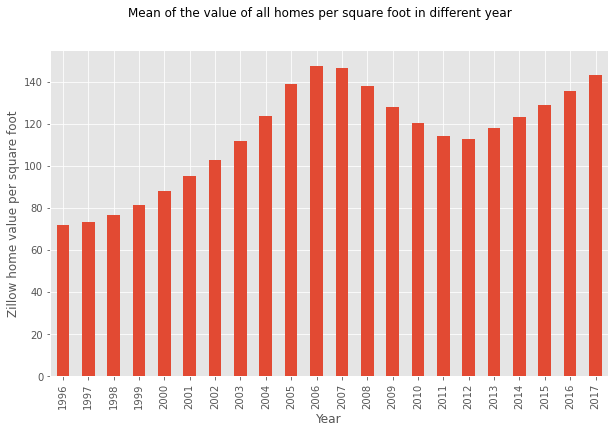

In [5]:
df_city_time_seris.Date = pd.to_datetime(df_city_time_seris.Date)
df_city_time_seris.groupby(df_city_time_seris.Date.dt.year)['ZHVIPerSqft_AllHomes'].mean().plot(
    kind='bar', figsize=(10, 6))
plt.suptitle('Mean of the value of all homes per square foot in different year', fontsize=12)
plt.ylabel('Zillow home value per square foot')
plt.xlabel('Year')
plt.show()

# Median of list prices per square foot in different year
- How median of list prices are calculated: Median of list prices divided by the square footage of a home
- It looks like list prices are high in 2017 compares to the previous year.




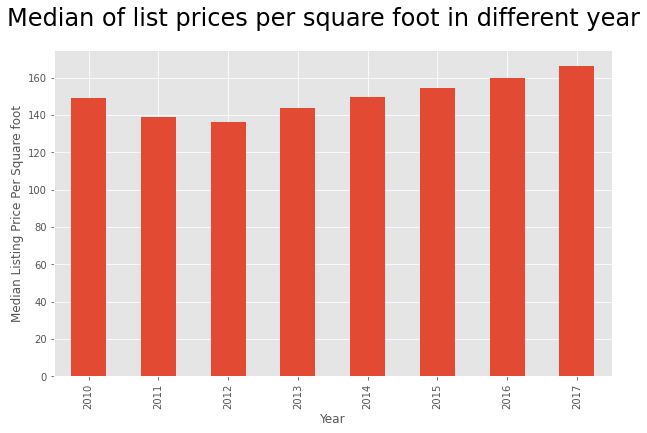

In [6]:
df_city_time_seris_without_null = df_city_time_seris.dropna(
    subset=['MedianListingPricePerSqft_AllHomes'], how='any')
df_city_time_seris_without_null \
    .groupby(df_city_time_seris_without_null.Date.dt.year)['MedianListingPricePerSqft_AllHomes'] \
    .mean().plot(kind='bar', figsize=(10, 6))
plt.suptitle('Median of list prices per square foot in different year', fontsize=24)
plt.ylabel('Median Listing Price Per Square foot')
plt.xlabel('Year')
plt.show()

# Median of rental prices per square foot in different year
- How median of rental prices are calculated: Median of the rental price per square foot of homes listed for rent on Zillow in a given region

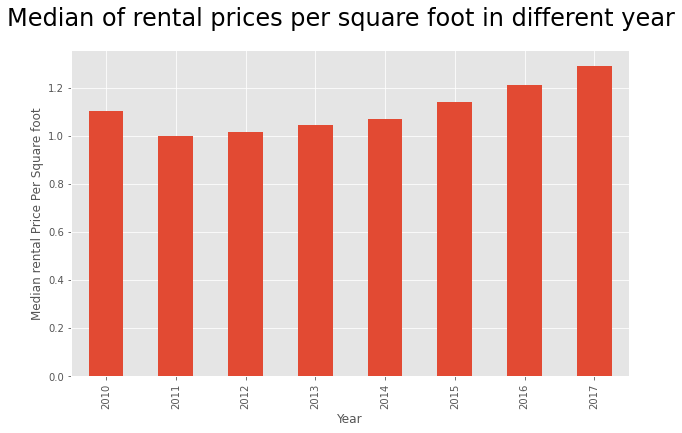

In [7]:
df_city_time_seris_without_null_rent = df_city_time_seris.dropna(
    subset=['MedianRentalPricePerSqft_AllHomes'], how='any')
df_city_time_seris_without_null_rent.groupby(df_city_time_seris_without_null_rent.Date.dt.year) \
    ['MedianRentalPricePerSqft_AllHomes'].mean().plot(kind='bar', figsize=(10, 6))
plt.suptitle('Median of rental prices per square foot in different year', fontsize=24)
plt.ylabel('Median rental Price Per Square foot')
plt.xlabel('Year')
plt.show()

# Zillow's different home value in different year
- Zillow home differs from many housing types. Like 2, 3 or 4 bedrooms.
- It looks like the comparison of 2,3 and 4 bedroom house price is always same.

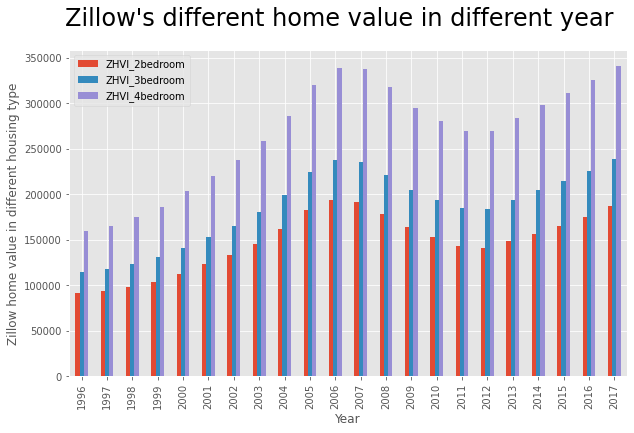

In [8]:
df_city_time_seris.groupby(df_city_time_seris.Date.dt.year) \
    [['ZHVI_2bedroom','ZHVI_3bedroom','ZHVI_4bedroom']].mean().plot(kind='bar', figsize=(10, 6))
plt.suptitle("Zillow's different home value in different year", fontsize=24)
plt.ylabel('Zillow home value in different housing type')
plt.xlabel('Year')
plt.show()

# Median of the value of all homes per square foot in different states

In [9]:
# let's replace the regionName column value with State name from cities_crosswalk.csv
df_city_time_seris['RegionName'] = df_city_time_seris['RegionName'] \
    .map(df_cities_crosswalk.set_index('Unique_City_ID')['State'])
# group regionName with ZHVIpersqft mean value
df_regi_zhvi_sq_mean = df_city_time_seris.groupby(df_city_time_seris.RegionName)['ZHVIPerSqft_AllHomes'] \
    .mean().reset_index(name = "ZHVIpersqft_mean")
# drop null values
df_regi_zhvi_sq_mean = df_regi_zhvi_sq_mean.dropna(subset=['ZHVIpersqft_mean'], how='any')

In [10]:
scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']]


# difine our data for plotting
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df_regi_zhvi_sq_mean['RegionName'], # location (states)
        z = df_regi_zhvi_sq_mean['ZHVIpersqft_mean'].astype(float), # Zillow Home value per square foot
        locationmode = 'USA-states', # let's define the location mode to USA_states
        text = 'Median home value per square foot',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Home value per square foot")
        ) ]

layout = dict(
    title = 'Median of the value of all homes per square foot in different states<br>(Hover for breakdown)',
    geo = dict(
        scope='usa',
        projection=dict( type='albers usa' ),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
         )

    
fig = dict( data=data, layout=layout )
# let's plot
py.iplot( fig, filename='d3-cloropleth-map' )

In [11]:
df_city_time_series = pd.read_csv('./data/City_time_series.csv',parse_dates=['Date'])
# drop null values in ZHVIPerSqft_AllHomes because we are interested in this column
df_city_time_series = df_city_time_series.dropna(subset=['ZHVIPerSqft_AllHomes'])
df_city_time_series.head()

Date  ... Zri_SingleFamilyResidenceRental
1 1996-04-30  ...                             NaN
2 1996-04-30  ...                             NaN
5 1996-04-30  ...                             NaN
7 1996-04-30  ...                             NaN
9 1996-04-30  ...                             NaN

[5 rows x 81 columns]

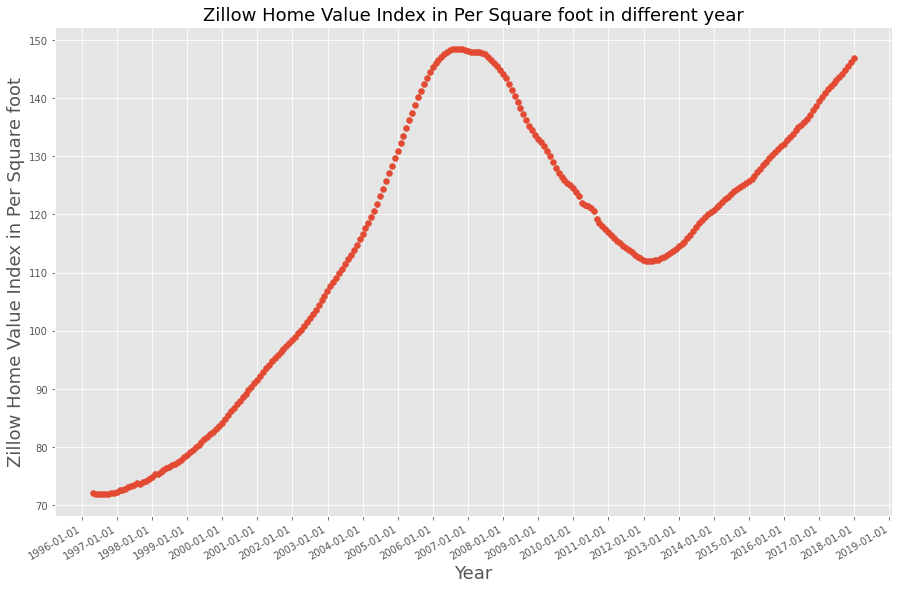

In [15]:
# the ZHVIPerSqft_AllHomes column has many value in same date but for different location. 
# For this notebook we are not interested in location. We mean all the value in same date
df_zhvi_sqft_all = df_city_time_series.set_index('Date') \
                    .groupby(pd.Grouper(freq='d')).mean().dropna(how='all') \
                    .ZHVIPerSqft_AllHomes

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(df_zhvi_sqft_all.index, df_zhvi_sqft_all)
# change x axis year location interval to 1 year. So that it displays data in interval of 1 year
ax.xaxis.set_major_locator(mdates.YearLocator(1))
# Add the title to the graph
plt.title('Zillow Home Value Index in Per Square foot in different year', fontsize=18)
# add xlabel
plt.xlabel('Year', fontsize=18)
# add ylabel
plt.ylabel('Zillow Home Value Index in Per Square foot', fontsize=18)
# beautify the x axis date presentation
fig.autofmt_xdate()
# And finally show the plot in a new window.
plt.show()


In [16]:
# create a differenced series
# this is to make time series stationary
# why stationarity? => https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

# frame a sequence as a supervised learning problem
# this methods will create a column and column value will be 1 shift from the data. 
# it will make our data to supervised so that we can feed into network
def timeseries_to_supervised(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train_scaled = scaler.transform(train)
    # transform test
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled